In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [60]:
path_data = "/content/releve_de_1000_etudiants_series_S2.csv"
data = pd.read_csv(path_data)

In [61]:
data["Moy"] = round((data.Maths*5 + data.PC*6 +	data.SVT*6 + data.Philo*2	+ data.Fr*3	+ data.Anglais*2	+ data.HG*2) / 26, 2)

In [62]:
data = data[data["Moy"] >= 10]

In [63]:
data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]] = StandardScaler().fit_transform(data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]])

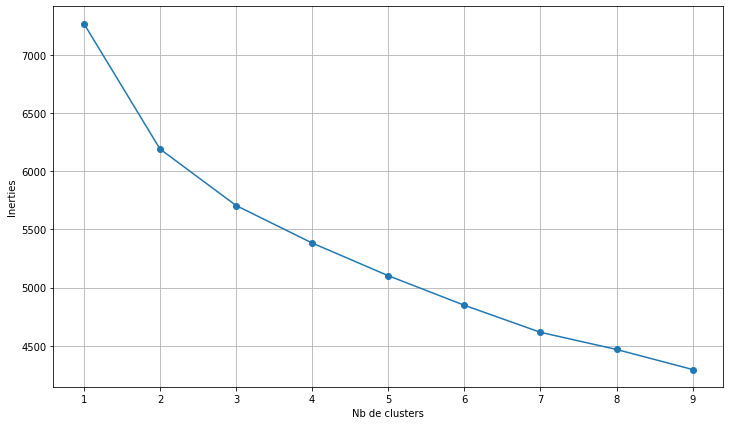

In [64]:
def optimize_k_mean(data, max_k):
  means = []
  inerties = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inerties.append(kmeans.inertia_)

  fig = plt.subplots(figsize=(12, 7))
  plt.plot(means, inerties, 'o-')
  plt.xlabel("Nb de clusters")
  plt.ylabel('Inerties')
  plt.grid(True)
  plt.show()

optimize_k_mean(data, 10)

In [65]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [66]:
data['kmeans_3'] = kmeans.labels_

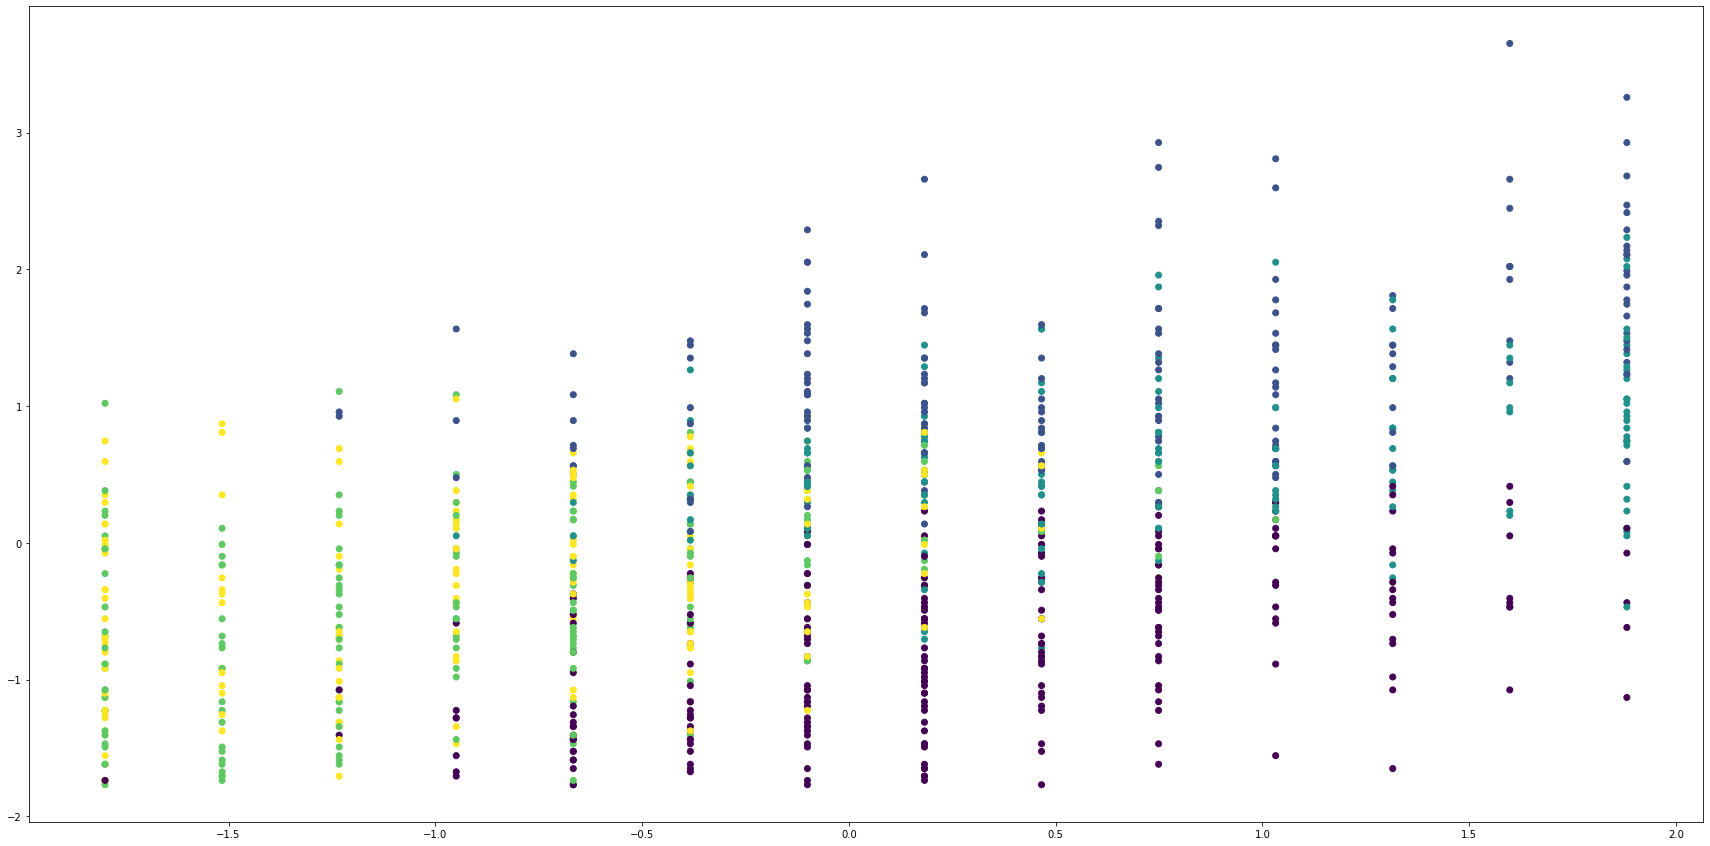

In [67]:
plt.figure(figsize=(30, 15))
plt.scatter(data["PC"], data["Moy"], c=data["kmeans_3"])